# Handwritten digit classifiaction on MNIST data

## Loading the data from keras dataset as it comes preloaded

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train[0].shape

(28, 28)

## Diplaying the 100 randomly selected data as image

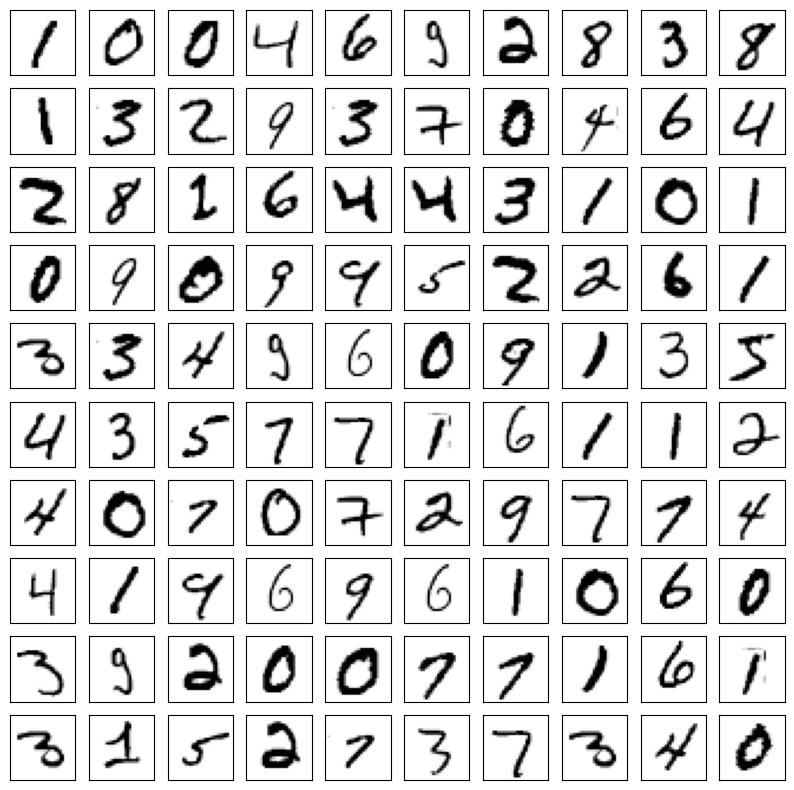

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(10,10)
fig.set_size_inches(10, 10)
xx,yy = np.meshgrid(np.arange(10),np.arange(10))
coordinates = np.vstack([xx.ravel(), yy.ravel()]).T
for coordinate in coordinates:
    ax[coordinate[0],coordinate[1]].imshow(X_train[np.random.randint(100)],cmap='Greys')
    ax[coordinate[0],coordinate[1]].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)

## Bringing the coordinates under same scale as this helps in better prediction

In [7]:
X_train = X_train / 255
X_test = X_test / 255

## Building the model in keras having 2 hidden layers with 128 and 32 neurons and a flatten layer for input each 2d array as 1d array

In [1]:
from tensorflow.keras import Sequential
model = Sequential()

In [2]:
from tensorflow.keras.layers import Dense, Flatten
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu', input_dim = 786))
model.add(Dense(32, activation = 'relu', input_dim = 786))
model.add(Dense(10, activation = 'Softmax'))
          

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.20)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.9212 - val_loss: 0.1444 - val_accuracy: 0.9587
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.1120 - val_accuracy: 0.9669
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.1038 - val_accuracy: 0.9693
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.1139 - val_accuracy: 0.9677
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0981 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.1223 - val_accuracy: 0.9668
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0989 - val_accuracy:

In [10]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [11]:
y_pred = y_prob.argmax(axis=1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9759

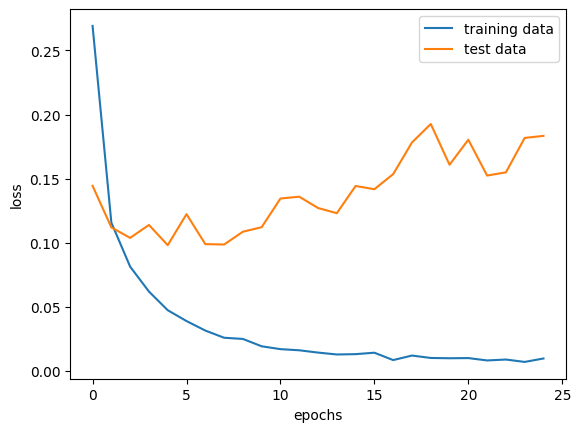

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training data','test data'])